<a href="https://colab.research.google.com/github/cam2149/MachineLearningII/blob/main/Clustering-con-k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Ejemplo de clustering con k-means en Python</h1>
  <p>
  <h3><b>Fuente:</b> https://exponentis.es/ejemplo-de-clustering-con-k-means-en-python</h3>
  </p>
</div>

<div class="markdown-google-sans">
  <p>Sin duda k-means es uno de los algoritmos de aprendizaje automático no supervisado más popular. El objetivo de k-means es simple: agrupa puntos de datos similares con el objetivo de descubrir patrones subyacentes. Para lograr este objetivo, k-means busca un número fijo (k) de agrupamientos (clústers) en el conjunto de datos .
  <h2>1. Funcionamiento básico de k-means</h2>
  Aunque estoy casi seguro que si has llegado hasta aquí ya conoces cómo funciona k-means (y lo que buscas es un ejemplo de uso) permíteme que te haga una muy breve descripción de su funcionamiento.
</p>
<p>Aunque estoy casi seguro que si has llegado hasta aquí ya conoces cómo funciona k-means (y lo que buscas es un ejemplo de uso) permíteme que te haga una muy breve descripción de su funcionamiento.</p>
<p>En k-means<strong> se define de inicio un número </strong><em><strong>k</strong></em>, que se refiere al número de centroides en los que se dividirá el conjunto de datos. Cada centroide sería la ubicación que marca el centro de cada agrupación.<br><strong>A cada punto se asigna uno de los grupos mediante la reducción de la suma de cuadrados en el grupo</strong>. Dicho de otra forma, el algoritmo k-means identifica <em>k</em> número de centroides, y luego asigna cada punto de los datos al grupo más cercano, mientras mantiene los centroides lo más pequeños posible.</p>
<p>Una vez tenemos cada punto asociado a un clúster, <strong>podemos etiquetarlo en el <em>dataframe</em> original</strong> asociándolo a dicho grupo y “catalogando” por tanto nuestros datos.</p>
</div>

<h4 class="wp-block-heading">2. Datos de inicio: valores de las acciones de Samsung.</h4>
<p>Vamos a aplicar el algoritmo sobre <strong>un conjunto de datos de las acciones de </strong><a href="https://markets.businessinsider.com/stocks/samsung-stock"><strong>Samsung</strong></a><strong> en bolsa</strong> para determinar cómo se agrupan usando k-means. Para ello nos descargamos de la web de <a rel="noreferrer noopener" aria-label="Yahoo Finanzas (abre en una nueva pestaña)" href="https://es.finance.yahoo.com/quote/005930.KS?p=005930.KS&amp;.tsrc=fin-srch" target="_blank">Yahoo Finanzas</a> el histórico con los valores desde el 1 de enero de 2008 de las acciones de <em>Samsung Electronics Co., Ltd</em>.</p>
<p>De los datos descargados, buscaremos <strong>patrones de agrupamiento entre dos señales elegidas</strong>, en este caso seleccionamos la señal <strong>CLOSE</strong> (precio de cierre diario) y la señal <strong>VOLUME</strong> (volumen de contrataciones diario). Contaremos con una <em>dataframe</em> con los <strong>datos diarios desde el 1 de enero de 2008 hasta el 28 de junio de 2019</strong>, lo que nos da un total de 2849 registros (que serán algo menos cuando limpiemos los valores nulos).</p>
<p>NOTA: podemos aplicar k-means sobre todas las señales/variables necesarias, pero para poder visualizar los agrupamientos k-means en una gráfica 2-D aplicaremos el algoritmo exclusivamente sobre la dos señales anteriormente detalladas.</p>



<h4 class="wp-block-heading">3. Carga de librerías y del <em>dataframe</em>.</h4>

<p>Las librerías usadas serán <a rel="noreferrer noopener" aria-label="Pandas (abre en una nueva pestaña)" href="https://pandas.pydata.org/" target="_blank">Pandas</a> para almacenar y manipular el <em>dataframe</em>, <a rel="noreferrer noopener" href="https://scikit-learn.org/stable/modules/preprocessing.html" target="_blank">Preprocessing</a> para normalizar los datos antes de aplicar al algoritmo, <a rel="noreferrer noopener" aria-label="KMeans (abre en una nueva pestaña)" href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html" target="_blank">KMeans</a> para realizar el clustering,  y <a href="https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html">Pyplot</a> para hacer las representaciones gráficas.</p>

<p>El <em>dataframe</em> cargado queda de la siguiente forma:</p>

In [196]:
#%% Carga del dataframe.
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [197]:
#%% Carga del dataframe.
url_data = 'https://github.com/cam2149/MachineLearningII/raw/08967e0c9145c90135fec839db6f24ca41ab7937/Samsung_11_14_24-01_02_08.csv'
new_headers = ['Open', 'Close', 'DailyHigh', 'DaiLow', 'High', 'Low','Volume','Date']
dfSamsung = pd.read_csv(url_data, header=0, names=new_headers)

dfSamsung['High'] = dfSamsung['High'].astype(str)
dfSamsung['Low'] = dfSamsung['Low'].astype(str)
dfSamsung['Volume'] = dfSamsung['Volume'].astype(str)
dfSamsung['Volume'] = dfSamsung['Volume'].str.replace('.0', '')
dfSamsung['Volume'] = dfSamsung['High'] + dfSamsung['Low'] + dfSamsung['Volume']
dfSamsung = dfSamsung.drop(['High', 'Low'], axis=1)
dfSamsung['Volume'] = dfSamsung['Volume'].astype(int)
dfSamsung[0:5]


,Open,Close,DailyHigh,DaiLow,Volume,Date
0,50200,49900,51800,49900,45107400,11/14/24
1,52000,50600,53000,50500,50647543,11/13/24
2,54600,53000,54600,53000,32714953,11/12/24
3,56700,55000,56800,55000,29468632,11/11/24
4,58000,57000,58300,57000,13432473,11/08/24


In [198]:
dfSamsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       4164 non-null   int64 
 1   Close      4164 non-null   int64 
 2   DailyHigh  4164 non-null   int64 
 3   DaiLow     4164 non-null   int64 
 4   Volume     4164 non-null   int64 
 5   Date       4164 non-null   object
dtypes: int64(5), object(1)
memory usage: 195.3+ KB


<h4 class="wp-block-heading">4. Preprocesado de los datos.</h4>
<p>En primer lugar, eliminamos los <a rel="noreferrer noopener" aria-label="datos vacíos (NA)  (abre en una nueva pestaña)" href="https://es.wikipedia.org/wiki/N/a" target="_blank">datos vacíos (NA) </a>y resetamos el índice. El objetivo de dicho reseteo es que el índice que numera las filas no se reajusta cuando eliminamos filas vacías, y pueden presentarse problemas de dimensionalidad al extraer columnas para posteriormente agregarlas:</p>

In [199]:
#%% Se eliminan filas que tengan valor NaN.
countCollumns = len(dfSamsung)
dfSamsung.dropna(how='all', inplace=True)
dfSamsung.reset_index(drop=True)

 # Describir el efecto de la eliminación
print("Número de filas antes de eliminar datos nulos:", countCollumns)
print("Número de filas después de eliminar datos nulos:", len(dfSamsung))
print("Número de filas eliminadas:", len(dfSamsung) - countCollumns)

Número de filas antes de eliminar datos nulos: 4164
Número de filas después de eliminar datos nulos: 4164
Número de filas eliminadas: 0


<p>En nuestro ejemplo el <em>dataset</em> “limpio” es de 4164 registros</p>
<p>El siguiente paso es extraer la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable <em>dates</em>, ya que volveremos a insertarla en nuestro <em>dataframe</em> tras aplicar el algoritmo:</p>



In [200]:
dfSamsung

,Open,Close,DailyHigh,DaiLow,Volume,Date
0,50200,49900,51800,49900,45107400,11/14/24
1,52000,50600,53000,50500,50647543,11/13/24
2,54600,53000,54600,53000,32714953,11/12/24
3,56700,55000,56800,55000,29468632,11/11/24
4,58000,57000,58300,57000,13432473,11/08/24
...,...,...,...,...,...,...
4159,10380,10320,10480,10320,24566250,01/08/08
4160,10360,10380,10480,10340,394100,01/07/08
4161,10920,10780,10960,10760,17287800,01/04/08
4162,10760,10920,11060,10640,19314150,01/03/08


In [201]:
#%% Eliminamos las columna de 'Date','Open','DailyHigh','DaiLow' que no usaremos en el algoritmo.
deleteCollumns = ['Date','Open','DailyHigh','DaiLow']
dates = dfSamsung['Date'] # Guardamos la columna Date.
dfSamsung = dfSamsung.drop(deleteCollumns, axis=1, errors='ignore') # Borramos la columna del dataframe.

In [202]:
dfSamsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4164 entries, 0 to 4163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   4164 non-null   int64
 1   Volume  4164 non-null   int64
dtypes: int64(2)
memory usage: 65.2 KB


<h4 class="wp-block-heading">5. Normalización de los datos.</h4>
<p>Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, <strong>los datos deben ser normalizados</strong> antes de aplicarles el algoritmo. En este caso utilizaremos la <a rel="noreferrer noopener" aria-label="función MinMaxScaler() (abre en una nueva pestaña)" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html" target="_blank">función MinMaxScaler()</a> que normaliza todos los datos entre [0, 1].</p>

In [203]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler()
dfSamsungScaler = min_max_scaler.fit_transform(dfSamsung)
dfSamsungScaler = pd.DataFrame(dfSamsungScaler) # Hay que convertir a DF el resultado.
dfSamsungScaler = dfSamsungScaler.rename(columns = {0:'Close',	1:'Volume'})

<p>Tras aplicar el escalado, nuestro nuevo <em>dataframe</em> normalizado se llama <em>df_ escalado</em> y tiene todos sus valores normalizados entre [0,1]:</p>

<h4 class="wp-block-heading">6. Representación gráfica de los datos.</h4>

<p>Ahora podemos echar un vistazo a la <strong>representación gráfica</strong> de nuestros datos. En el <strong>eje x</strong> representaremos el precio de cierre (CLOSE) y en el <strong>eje y</strong> el volumen (VOLUME):</p>

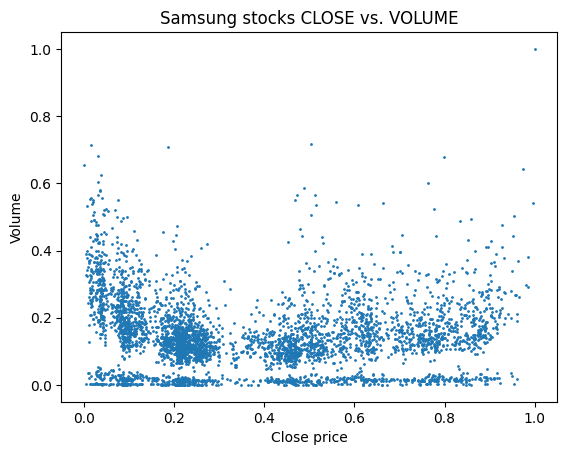

In [204]:
#%% Representación gráfica de los datos.
x = dfSamsungScaler['Close'].values
y = dfSamsungScaler['Volume'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks CLOSE vs. VOLUME')
plt.plot(x,y,'o',markersize=1)

<p>A priori, para el caso se este caso de estudio tomaremos como referencia la variable <b>"CLOSE"</b> de los cuatro gráficos. </p>
<p>La nube de puntos parece indicar que, <strong>a mayor volumen menor es el precio</strong> estabilizándose conforme el precio aumenta.</p>
<p>Hay que indicar que hemos representado gráficamente los datos normalizados, pero que, <strong>si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual</strong>, con la única diferencia que la escala de los ejes sería diferente. </p>

<h4 class="wp-block-heading">7. Aplicación de k-means.</h4>
<p>El primer paso antes de aplicar k-means es <strong>decidir qué valor de </strong><em><strong>k</strong></em><strong> (número de clústeres) queremos usar</strong>. Una forma de elegir este valor <em>k</em> es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos.</p>
<p>La otra opción es realizar una <a rel="noreferrer noopener" aria-label="gráfica elbow o de codo (abre en una nueva pestaña)" href="https://bl.ocks.org/rpgove/0060ff3b656618e9136b" target="_blank">gráfica </a><em><a rel="noreferrer noopener" aria-label="gráfica elbow o de codo (abre en una nueva pestaña)" href="https://bl.ocks.org/rpgove/0060ff3b656618e9136b" target="_blank">elbow</a></em><a rel="noreferrer noopener" aria-label="gráfica elbow o de codo (abre en una nueva pestaña)" href="https://bl.ocks.org/rpgove/0060ff3b656618e9136b" target="_blank"> o de codo</a> para <strong>determinar el número óptimo de clústeres</strong>. Hacemos una iteración de k-means variando el valor de <em>k</em>, de forma que representamos en el <strong>eje x</strong> dicho valor de<em> k</em> y en el <strong>eje y</strong> la <a href="https://hlab.stanford.edu/brian/error_sum_of_squares.html">suma de los errores cuadráticos (SSE)</a>. De esta forma podemos elegir el valor de <em>k</em> dónde se produce el “codo” de la curva:</p>

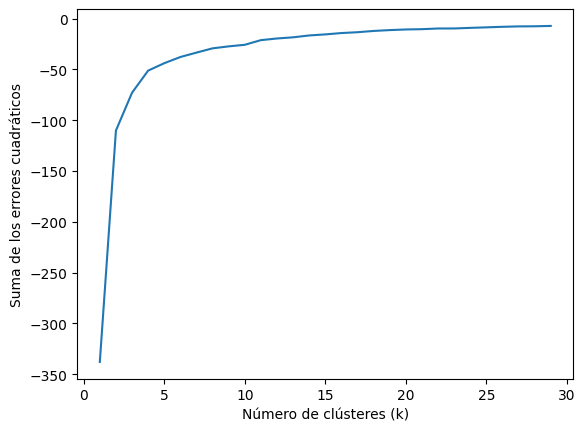

In [205]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(dfSamsungScaler).score(dfSamsungScaler) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

<p>La curva<em> elbow</em> nos muestra que un valor de <em><strong>k</strong></em><strong> = 3</strong> puede ser apropiado, aunque se podría probar con valores entre 2 y 5 y comparar resultados. <strong>No hay una solución, un valor de </strong><em><strong>k</strong></em><strong>,</strong><em> </em><strong>más correcto que otro</strong>, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que <strong>nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución</strong> escogida.</p>
<p>Así que ya podemos aplicar el algoritmo de k-means:</p>



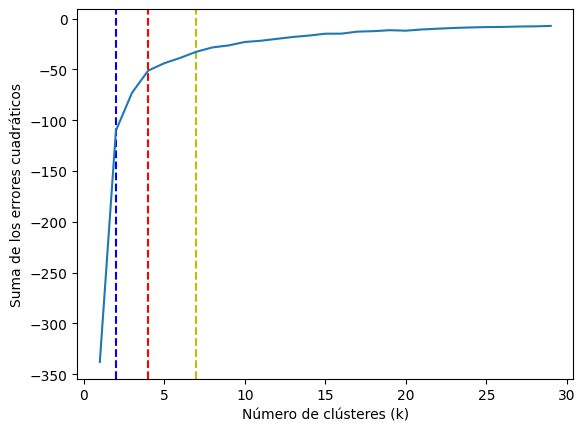

In [206]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(dfSamsungScaler).score(dfSamsungScaler) for i in range(len(kmeans))]
score
plt.axvline(x=2, color='b', linestyle='--')
plt.axvline(x=4, color='r', linestyle='--')
plt.axvline(x=7, color='y', linestyle='--')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [207]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(dfSamsungScaler)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.23401479 0.11000117]
 [0.80106191 0.15817422]
 [0.51844415 0.12497362]
 [0.08022041 0.30091539]
 [0.093812   0.09495871]]


<h4 class="wp-block-heading">8. Etiquetado de datos.</h4>
<p>Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos <strong>asignar cada registro de nuestro <em>dataset</em> a uno de los clústers</strong>:</p>

In [208]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(dfSamsungScaler)
dfSamsung['label'] = labels

<p>Hemos <strong>añadido la columna “label” a nuestro <em>dataframe</em> original</strong> sin normalizar, por lo que ahora, <strong>cada registro está asignado a un único clúster</strong>. Le añadimos también la columna “Date” que extrajimos al inicio para saber a qué fecha corresponde cada registro:</p>

In [209]:
#%% Añadimos la columna de fecha
dfSamsung.insert(0, 'Date', dates)

<p>El <em>dataframe</em> etiquetado queda así:</p>

In [210]:
dfSamsung

,Date,Close,Volume,label
0,11/14/24,49900,45107400,2
1,11/13/24,50600,50647543,2
2,11/12/24,53000,32714953,2
3,11/11/24,55000,29468632,2
4,11/08/24,57000,13432473,2
...,...,...,...,...
4159,01/08/08,10320,24566250,3
4160,01/07/08,10380,394100,4
4161,01/04/08,10780,17287800,4
4162,01/03/08,10920,19314150,3


<h4 class="wp-block-heading">9. Representación gráfica de los clústeres k-means.</h4>
<p>Una vez con los datos etiquetados, podemos <strong>visualizar gráficamente en dos dimensiones el clustering realizado por k-means</strong>, ya que hemos usado sólo dos variables.</p>

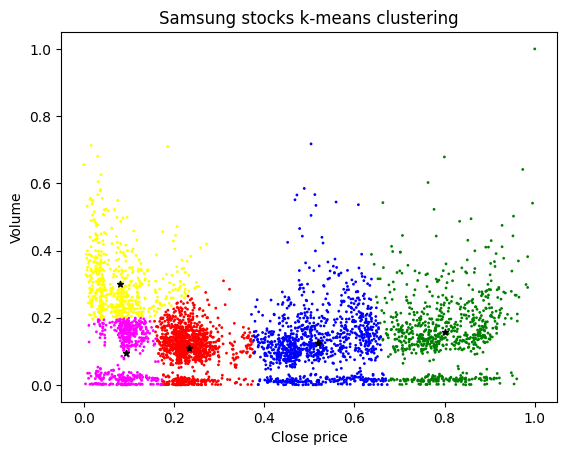

In [211]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

<p>Hemos creado una lista de 5 colores, una para cada clúster y se ha marcado cada centroide con un punto estrellado de color negro:</p>

<p>La interpretación de los grupos creados por k-means es una<strong> tarea que debe realizar el especialista de los datos</strong>. En este caso, y de forma simplificada, podríamos describir cada grupo de la siguiente forma:</p>
<ul class="wp-block-list"><li><strong>Clúster azul</strong>: grupo de bajo volumen y precio de cierre tambien bajo. Los dos puntos de la parte superior podrían considerarse outliers.</li><li><strong>Clúster rojo</strong>: grupo de volumen alto y precio de cierre bajo.</li><li><strong>Clúster fucsia</strong>:  grupo de volumen bajo y precio de cierre bajo.</li><li><strong>Clúster verde</strong>: grupo de volumen bajo y precio de cierre medio.</li><li><strong>Clúster amarillo</strong>: grupo de volumen medio y precio de cierre alto.</li></ul>
<h4 class="wp-block-heading">10. Clasificación de nuevas muestras.</h4>
<p>Por último, queda por determinar la forma de clasificar nuevas muestras. Es decir, que <strong>dados nuevos datos de entrada, determinar a qué clúster pertenecen</strong>.</p>
<p>Supongamos que nuestros <strong>nuevos datos a categorizar</strong> son los siguientes:</p>
<ul class="wp-block-list"><li><strong>CLOSE</strong>: 46.850</li><li><strong>VOLUME</strong>: 7.196.370</li></ul>
<p>Introducimos estos nuevos datos como un <em>dataframe</em> de una única fila:</p>

In [212]:
close = 46850
volume = 7196370

nuevoDato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevoDato = nuevoDato.rename(columns = {0: 'Close', 1: 'Volume'})

<p><strong>No podemos introducir como tal estos valores en el algoritmo k-means ya que no están normalizados</strong>. Así que en primer lugar hay que normalizar, y para ello debemos agregarlos al conjunto de datos original. </p><p>Añadimos por tanto esta nueva fila de datos a nuestro <em>dataframe</em> de inicio y lo guardamos con el nombre <em>df_n</em> para no sobrescribir el original:</p>


In [213]:

dfDummySamsung = pd.concat([dfSamsung, nuevoDato], ignore_index=True)

In [214]:
dfDummySamsung.tail(1)

,Date,Close,Volume,label
4164,NaN,46850,7196370,NaN


Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice:



In [215]:
#Eliminar las columnas Data y label de df_n

dfDummySamsung = dfDummySamsung.drop(['Date', 'label'], axis=1)
dfDummySamsung = dfDummySamsung.reset_index(drop=True)

<p>Ahora procedemos a normalizar el <em>Dataframe</em> completo como hizo anteriormente:</p>

In [216]:
min_max_scaler = preprocessing.MinMaxScaler()
dfDummySamsungScaler = min_max_scaler.fit_transform(dfDummySamsung)
dfDummySamsungScaler = pd.DataFrame(dfDummySamsungScaler) # Hay que convertir a DF el resultado.
dfDummySamsungScaler = dfDummySamsungScaler.rename(columns = {0: 'Close', 1: 'Volume'})

<p>Ya tenemos nuestros nuevos datos (última final del dataframe) normalizados</p>
<p>Por tanto, los valores normalizados son:</p>





In [217]:
dfDummySamsungScaler.tail(1)

,Close,Volume
4164,0.467109,0.080426


<p>Podemos introducir estos nuevos datos ya normalizados a mano o extraerlos en forma de vector <a href="https://www.numpy.org/" target="_blank" rel="noreferrer noopener" aria-label="numpy (abre en una nueva pestaña)">numpy</a>:</p>

In [218]:
close_n = dfDummySamsungScaler['Close'][2784]
volume_n = dfDummySamsungScaler['Volume'][2784]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra

In [219]:
X_new

array([[0.21834641, 0.22630119]])

<p>Por último, introducimos el <em>array</em> X_new en k-means:</p>

In [220]:
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<h4 class="wp-block-heading">11. Representación gráfica de la nueva muestra.</h4>
<p>El resultado es el <strong>clúster 2</strong>, que en nuestro caso es el <strong>FUCSIA</strong>, es decir, grupo de bajo volumen y precio de cierre bajo.</p>
<p>Podemos<strong> representar gráficamente el nuevo punto</strong> y verificar que, efectivamente, corresponde con el clúster FUCSIA:</p>

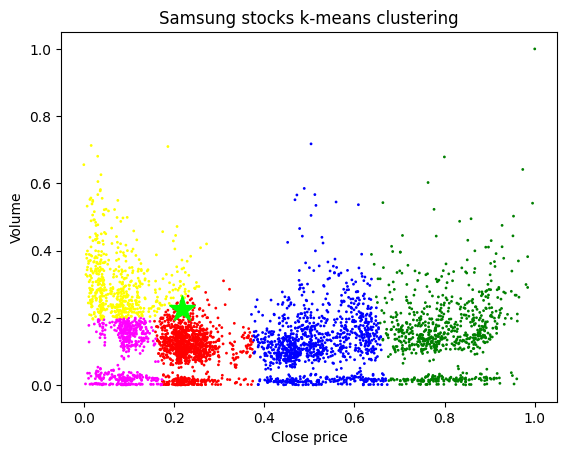

In [221]:
#%% Plot del nuevo dato clusterizado.

colores=['red','green','blue','yellow','fuchsia']

asignar=[]
for row in labels:
     asignar.append(colores[row])

fig, ax = plt.subplots()
x_n = close_n
y_n = volume_n

plt.plot(x_n,y_n, '*', color = 'lime', markersize = 20)
plt.scatter(x, y, c=asignar, s=1)
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

<p>El resultado es el <strong>clúster 3</strong>, que en nuestro caso es el <strong>FUCSIA</strong>, es decir, grupo de bajo volumen y precio de cierre bajo.</p>